# Exercise 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1.4

In [2]:
# 1. Set up
class struct():
    pass

# T = 2

In [3]:
# 1. Set up
par = struct()
par.alpha = 0.5
par.beta = 0.9
par.T = 2

# Utility function
par.u = lambda x, par: x**par.alpha
# 2. State
par.M = 5

In [4]:
# 3. Solve for T = 2
Vstar = -np.inf
Cstar = [0 for x in range(par.T)]

for C1 in range(0,par.M + 1):       
        #a. Evaluate
        V = par.u(C1, par) + par.beta * par.u(par.M - C1, par)
        
                #b. Save max
        if V > Vstar:
            Vstar = V
            Cstar[0] = C1
            
            Cstar[1] = par.M - C1
            
        
print('Optimal consumption is',Cstar, 'with value function', Vstar)


Optimal consumption is [3, 2] with value function 3.004843013704663


# T = 3

In [5]:
# 1. Set up
par = struct()
par.alpha = 0.5
par.beta = 0.9
par.T = 3
# Utility function
par.u = lambda x, par: x**par.alpha
# 2. State
par.M = 5

In [6]:
# Solve
Vstar = -np.inf
Cstar = [0 for x in range(par.T)]

for C2 in range(0,par.M + 1):
    for C1 in range(0, par.M - C2):
        
        # a. Evaluate
        V = par.u(C2, par) + par.beta * par.u(C1,par) + (par.beta)**2 * par.u(par.M-C2-C1,par)
        
        # b. Save max
        if V > Vstar:
            Vstar = V
            Cstar[0] = C1
            Cstar[1] = C2
            Cstar[2] = par.M - C1 - C2
            

print('Optimal consumption is',Cstar, 'with value function', Vstar)

Optimal consumption is [2, 2, 1] with value function 3.4970057685088807


# Backwards Induction

In [7]:
# 1. Set up
par = struct()
par.alpha = 0.5
par.beta = 0.70
par.T = 10
# Utility function
par.u = lambda x, par: x**par.alpha
# 2. State
par.M = 5

In [8]:
# Solve
Cstar, Vstar = dict(), dict()

# Initialize end period
Cstar[par.T] = np.arange(par.M+1)
Vstar[par.T] = par.u(Cstar[par.T], par)

for t in reversed(range(1,par.T)):
    Cstar[t] = np.zeros(par.M+1)
    Vstar[t] = np.zeros(par.M+1)
    
    for m in range(0, par.M+1): # 0 to 5
        Vstar[t][m] = -np.inf 
        
        for C in range(m+1): # 0 to m
            V = par.u(C, par) + par.beta * Vstar[t+1][m-C]
            if V > Vstar[t][m]:
                Vstar[t][m] = V
                Cstar[t][m] = C 

# Simulate $C_1,... C_{10}$ with $M = 5$ and $T = 10$

In [9]:
C = np.zeros(par.T)
C[0] = Cstar[1][par.M]

for i in range(1,par.T):
    tot_C = sum(C)
    C[i] = Cstar[i+1][int(par.M - tot_C)]

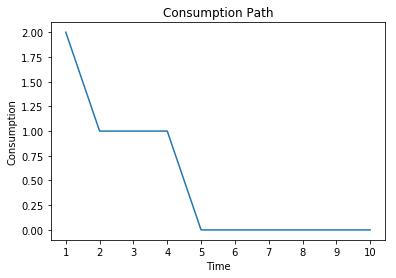

In [10]:
plt.figure()
x = np.linspace(1,10,10)
plt.plot(x,C)
plt.title('Consumption Path'); plt.ylabel('Consumption'); plt.xlabel('Time'); plt.xticks(range(1,11))
plt.show()

# Exercise 2

## 2.1

In [11]:
# 1. Set up
par = struct()
par.alpha = 0.5
par.beta = 0.9
par.pi = 0.5
par.T = 10

# Utility function
par.u = lambda x, par: x**par.alpha
# 2. State
par.M = 10

In [12]:
# Input to model
Cstar, Vstar = dict(), dict()

# Initialize end period
Cstar[par.T] = np.arange(par.M + par.T + 1)
Vstar[par.T] = par.u(Cstar[par.T], par)

for t in reversed(range(1,par.T)):
    Cstar[t] = np.zeros(par.M + par.T +1)
    Vstar[t] = np.zeros(par.M + par.T +1)
    
    for m in range(1,par.M+t+1): # We can have M+t ressources in period t
        Vstar[t][m] = -np.inf
        for C in range(0,m):
            if t == par.T:
                V = par.u(C, par) # Consume everything - really not necessary, as we have already initialized above
            else:
                EV = (1-par.pi) * Vstar[t+1][m-C] + par.pi * Vstar[t+1][m-C+1]
                V = par.u(C, par) + par.beta * EV
                
            if V > Vstar[t][m]:
                Vstar[t][m] = V
                Cstar[t][m] = C 
                 

## 2.2. Plot first period consumption

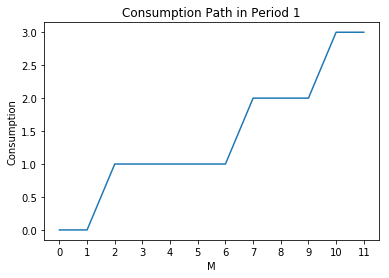

In [13]:
Cstar1 = Cstar[1][0:12]
#Vstar1 = Vstar[1][0:12]

plt.figure()
x = np.linspace(1,12,12)
x = x - 1
plt.plot(x,Cstar1)
#plt.plot(x,Vstar1)
plt.title('Consumption Path in Period 1'); plt.ylabel('Consumption'); plt.xlabel('M'); plt.xticks(range(0,12))
plt.show()

## 2.3: Vary $\pi$ and check that both C and V move weakly upwards in it

$\pi = 0.5$

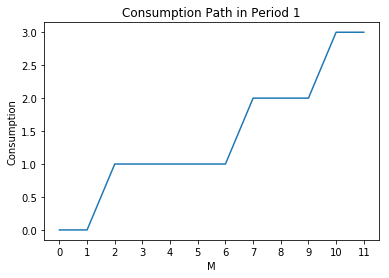

In [14]:
par.pi = 0.5

# Input to model
Cstar, Vstar = dict(), dict()

# Initialize end period
Cstar[par.T] = np.arange(par.M + par.T + 1)
Vstar[par.T] = par.u(Cstar[par.T], par)

for t in reversed(range(1,par.T)):
    Cstar[t] = np.zeros(par.M + par.T +1)
    Vstar[t] = np.zeros(par.M + par.T +1)
    
    for m in range(1,par.M+t+1): # We can have M+t ressources in period t
        Vstar[t][m] = -np.inf
        for C in range(0,m):
            if t == par.T:
                V = par.u(C, par) # Consume everything - really not necessary, as we have already initialized above
            else:
                EV = (1-par.pi) * Vstar[t+1][m-C] + par.pi * Vstar[t+1][m-C+1]
                V = par.u(C, par) + par.beta * EV
                
            if V > Vstar[t][m]:
                Vstar[t][m] = V
                Cstar[t][m] = C 
                
Cstar1 = Cstar[1][0:12]
#Vstar1 = Vstar[1][0:12]

plt.figure()
x = np.linspace(1,12,12)
x = x - 1
plt.plot(x,Cstar1)
#plt.plot(x,Vstar1)
plt.title('Consumption Path in Period 1'); plt.ylabel('Consumption'); plt.xlabel('M'); plt.xticks(range(0,12))
plt.show()


$\pi = 0.1$

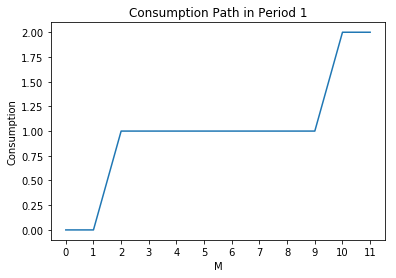

In [15]:
par.pi = 0.1

# Input to model
Cstar, Vstar = dict(), dict()

# Initialize end period
Cstar[par.T] = np.arange(par.M + par.T + 1)
Vstar[par.T] = par.u(Cstar[par.T], par)

for t in reversed(range(1,par.T)): # Notice, we are iterating from T-1 to 1 with T given above.
    Cstar[t] = np.zeros(par.M + par.T +1)
    Vstar[t] = np.zeros(par.M + par.T +1)
    
    for m in range(1,par.M+t+1): # We can have M+t ressources in period t
        Vstar[t][m] = -np.inf
        for C in range(0,m):
            if t == par.T:
                V = par.u(C, par) # Consume everything - really not necessary, as we have already initialized above
            else:
                EV = (1-par.pi) * Vstar[t+1][m-C] + par.pi * Vstar[t+1][m-C+1]
                V = par.u(C, par) + par.beta * EV
                
            if V > Vstar[t][m]:
                Vstar[t][m] = V
                Cstar[t][m] = C 
                
Cstar1 = Cstar[1][0:12]
#Vstar1 = Vstar[1][0:12]

plt.figure()
x = np.linspace(1,12,12)
x = x - 1
plt.plot(x,Cstar1)
#plt.plot(x,Vstar1)
plt.title('Consumption Path in Period 1'); plt.ylabel('Consumption'); plt.xlabel('M'); plt.xticks(range(0,12))
plt.show()


$\pi = 0.9$

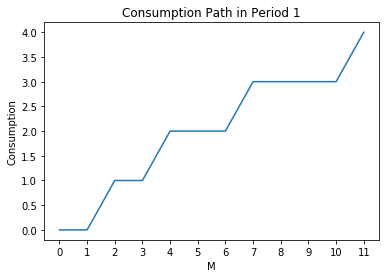

In [16]:
par.pi = 0.9

# Input to model
Cstar, Vstar = dict(), dict()

# Initialize end period
Cstar[par.T] = np.arange(par.M + par.T + 1)
Vstar[par.T] = par.u(Cstar[par.T], par)

for t in reversed(range(1,par.T)):
    Cstar[t] = np.zeros(par.M + par.T +1)
    Vstar[t] = np.zeros(par.M + par.T +1)
    
    for m in range(1,par.M+t+1): # We can have M+t ressources in period t
        Vstar[t][m] = -np.inf
        for C in range(0,m):
            if t == par.T:
                V = par.u(C, par) # Consume everything - really not necessary, as we have already initialized above
            else:
                EV = (1-par.pi) * Vstar[t+1][m-C] + par.pi * Vstar[t+1][m-C+1]
                V = par.u(C, par) + par.beta * EV
                
            if V > Vstar[t][m]:
                Vstar[t][m] = V
                Cstar[t][m] = C

Cstar1 = Cstar[1][0:12]
#Vstar1 = Vstar[1][0:12]

plt.figure()
x = np.linspace(1,12,12)
x = x - 1
plt.plot(x,Cstar1)
#plt.plot(x,Vstar1)
plt.title('Consumption Path in Period 1'); plt.ylabel('Consumption'); plt.xlabel('M'); plt.xticks(range(0,12))
plt.show()


# Exercise 3

## 3.1

In [17]:
from scipy import interpolate

In [18]:
def f(x):
    func = (x-3)**2
    return(func)

In [19]:
x_true = np.linspace(0,6,100)
f_true = f(x_true)
x_known = np.array([1,2,3,4,5])
f_known = f(x_known)

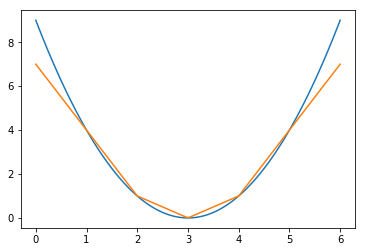

In [20]:
f_int_prel = interpolate.interp1d(x_known, f_known, kind='linear', fill_value = "extrapolate")
f_int = f_int_prel(x_true)

plt.plot(x_true,f_true)
plt.plot(x_true, f_int)
plt.show()

## 3.2

In [183]:
# 1. Set up
par = struct()
par.alpha = 0.5
par.beta = 0.5
par.pi = 0.5
par.T = 10

# Utility function
par.u = lambda x, par: x**par.alpha
# 2. State
par.M = 10

# 3. Grid
NC = NM = 50
grid_C = np.linspace(0,1,NC)

In [184]:
# Input to model
Cstar, Vstar, grid_M = dict(), dict(), dict() # Notice, grid is now also a dictionary, where the grid changes with t

# Initialize end period
Cstar[par.T] = np.linspace(0,par.M + par.T, NM) # Notice change
Vstar[par.T] = par.u(Cstar[par.T], par)    

In [207]:
# Loop

for t in reversed(range(1,par.T)): # Start in period T-1
    
    Cstar[t] = np.ones(NM) * np.nan # Notice change from par.M to M_grid
    Vstar[t] = np.ones(NM) * np.nan
    
    # a) Loop over states
    grid_M[t] = np.linspace(0,par.M + t, NM) # Make a grid over the possible ressources in period t
    
    for i_m in range(0,NM): # Loop over grid
        m = grid_M[t][i_m]
        Vstar[t][i_m] = -np.inf
        
        # b) Create interpolant of next period ressources
        interp = interpolate.interp1d(Cstar[t+1], Vstar[t+1], kind='linear', fill_value = "extrapolate")
        
        # c) Loop over choices
        for i_C in range(1,NC):
            C = grid_C[i_C] * m
            
            EV = (1-par.pi) * interp(m-C) + par.pi * interp(m-C+1)
            V = par.u(C, par) + par.beta * EV
        
        # d) Evaluate and save        
            if V > Vstar[t][i_m]:
                Vstar[t][i_m] = V
                Cstar[t][i_m] = C
                

## 3.2 Plot first period consumption
### It doesn't seem monotonically increasing in M, but this may be due to rounding errors computationally?

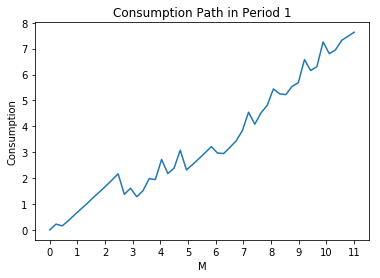

In [186]:
per = 1 # Period

plt.figure()
plt.plot(grid_M[per],Cstar[per])
plt.title('Consumption Path in Period ' + str(per)); plt.ylabel('Consumption'); plt.xlabel('M')
plt.xticks(range(0,11+per))
plt.show()

## 3.3 Using an optimizer instead of grid search